# 19대 대선 Overview
일생일대의 정권교체를 이룬 19대 대선.  데이터를 통해 분석해보자.

In [16]:
# -- encoding: utf-8 --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import os

%matplotlib inline

# set Korean to display on matplotlib
korfont = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family = korfont)

## Data Prep/Diagnostics

In [2]:
# import raw datafile for 19th presidential election
filename = "C:\\Users\\Neil\\Downloads\\@@20170510-19대선-투표구별개표자료(공개용).xlsx"
filecon = pd.ExcelFile(filename)

#check how many tabs
filecon.sheet_names
pres19 = pd.read_excel(filename, '19대선')

In [3]:
pres19.head(5)

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,후보자별 득표수,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,무효투표수,기권수
0,NaN,NaN,NaN,NaN,NaN,NaN,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,...,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬,계,NaN,NaN
1,전국,NaN,NaN,NaN,42479710.0,32807908.0,13423800,7852849,6998342,2208771,...,6040,21709,9140,27229,11355,18543,33990,32672175,135733.0,9671802.0
2,서울특별시,합계,NaN,NaN,8382999.0,6590646.0,2781345,1365285,1492767,476973,...,789,3554,1938,3416,1277,2177,3950,6568917,21729.0,1792353.0
3,서울특별시,종로구,합계,NaN,133769.0,102566.0,42512,22325,22313,7412,...,5,78,31,63,26,47,49,102202,364.0,31203.0
4,서울특별시,종로구,거소·선상투표,NaN,218.0,206.0,64,42,65,8,...,1,3,1,0,0,0,2,201,5.0,12.0


In [10]:
# check for factor values each variables take and count of null values
for var in pres19.columns.values:
    if 'Unnamed' not in var:
        factor = pres19[var].unique()
        nanct = pd.isnull(factor).sum()
        print('{}({},nan: {}): {}\n'.format(var, len(factor), nanct, factor[:10]))

# print all rows with any columns taking null value       
factor_vars = [var for var in pres19.columns.values if 'Unnamed' not in var]
pres19[pres19[factor_vars].isnull().any(1)]

시도명(19,nan: 1): [nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시']

구시군명(229,nan: 1): [nan '합계' '종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구']

읍면동명(3156,nan: 1): [nan '합계' '거소·선상투표' '관외사전투표' '재외투표' '청운효자동' '사직동' '삼청동' '부암동' '평창동']

투표구명(13161,nan: 1): [nan '합계' '관내사전투표' '청운효자동제1투' '청운효자동제2투' '청운효자동제3투' '사직동제1투' '사직동제2투'
 '삼청동투표소' '부암동제1투']

선거인수(7107,nan: 1): [             nan   4.24797100e+07   8.38299900e+06   1.33769000e+05
   2.18000000e+02   1.28030000e+04   2.49000000e+03   9.37800000e+03
   1.78400000e+03   2.49300000e+03]

투표수(6353,nan: 1): [             nan   3.28079080e+07   6.59064600e+06   1.02566000e+05
   2.06000000e+02   1.28030000e+04   1.81300000e+03   7.29500000e+03
   1.78400000e+03   1.68200000e+03]

후보자별 득표수(4221,nan: 0): ['더불어민주당\n문재인' 13423800 2781345 42512 64 5842 987 3109 819 664]

무효투표수(391,nan: 1): [             nan   1.35733000e+05   2.17290000e+04   3.64000000e+02
   5.00000000e+00   6.70000000e+01   8.00000000e+00   2.20000000e

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,후보자별 득표수,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,무효투표수,기권수
0,NaN,NaN,NaN,NaN,NaN,NaN,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,...,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬,계,NaN,NaN
1,전국,NaN,NaN,NaN,42479710.0,32807908.0,13423800,7852849,6998342,2208771,...,6040,21709,9140,27229,11355,18543,33990,32672175,135733.0,9671802.0
2,서울특별시,합계,NaN,NaN,8382999.0,6590646.0,2781345,1365285,1492767,476973,...,789,3554,1938,3416,1277,2177,3950,6568917,21729.0,1792353.0
3,서울특별시,종로구,합계,NaN,133769.0,102566.0,42512,22325,22313,7412,...,5,78,31,63,26,47,49,102202,364.0,31203.0
4,서울특별시,종로구,거소·선상투표,NaN,218.0,206.0,64,42,65,8,...,1,3,1,0,0,0,2,201,5.0,12.0
5,서울특별시,종로구,관외사전투표,NaN,12803.0,12803.0,5842,2025,2509,1156,...,0,4,2,15,6,9,6,12736,67.0,0.0
6,서울특별시,종로구,재외투표,NaN,2490.0,1813.0,987,215,304,75,...,0,1,0,1,0,0,0,1805,8.0,677.0
84,서울특별시,종로구,잘못 투입·구분된 투표지,NaN,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
85,서울특별시,중구,합계,NaN,109836.0,82852.0,34062,17901,19372,5874,...,12,53,21,55,18,25,51,82595,257.0,26984.0
86,서울특별시,중구,거소·선상투표,NaN,174.0,157.0,60,34,48,8,...,0,0,0,0,0,0,1,154,3.0,17.0


In [11]:
# define new variable column and identify key vars to melt further down
newvars = np.where(['Unnamed' in var or var == '후보자별 득표수' for var in pres19.columns.values], pres19.iloc[0], pres19.columns.values)
keyvars = [var1 for var1, var2 in zip(pres19.columns.values, pres19.iloc[0]) if 'Unnamed' not in var1 and var1 != '후보자별 득표수']

pres19.columns = newvars
pres19 = pres19.iloc[1:,:]

In [12]:
# melt data to long form
long = pres19.melt(keyvars, var_name = '후보자', value_name = '득표수')

# check if melting is correctly done
(long.loc[((long.시도명 == '전국') & (long.후보자 != '계')), '득표수'].sum() 
 == long.loc[(long.후보자 == '계') & (long.시도명 == '전국'), '득표수'])

288782    True
Name: 득표수, dtype: bool

## High-level summary

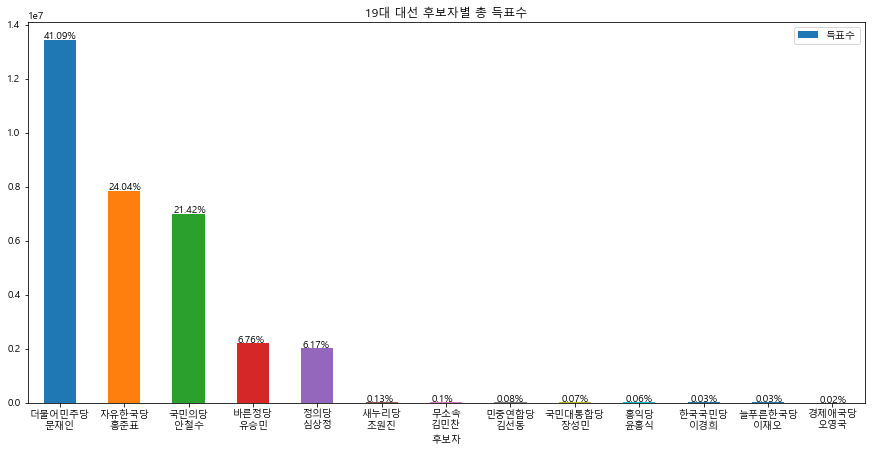

In [147]:
total = (long.loc[((long.시도명 == '전국') & (long.후보자 != '계')), ['후보자', '득표수']]
             .sort_values('득표수', ascending = False)
             .reset_index())

total['%'] = total.득표수  / total.득표수.sum()
ax = total.plot.bar('후보자','득표수',figsize = (15,7), title = '19대 대선 후보자별 총 득표수', rot=0)
#_ = ax.set_xticklabels(total.후보자, rotation = 0)

# annotate percentage count
for i, p in enumerate(ax.patches):
    perc = "{}%".format(round(total.loc[i, '%'] * 100, 2))
    ax.annotate(perc, (p.get_x() * 1.005, p.get_height() * 1.005))

## 선거인수 = 투표수 + 기권수?  투표수는 무효투표수 포함?
선관위에서 기록하는 선거 집계수에는 4가지 종류가 있다: <br/>
* 선거인수
* 투표수
* 무효투표수
* 기권수<br/>

선거인수라 하면 선거장에 들어간 총 머릿수 (headcount)로 이해할 수 있을 듯 하다.  어떤 이유에서건 선거장에 소중한 한 표를 행사하러 오긴 했으니 "참정권 행사 의지를 투표 참여행위로 드러낸 인원 수" 정도로 정의 될 수 있겠다.  기록 상으로도 선거인수는 투표수와 기권수의 합으로 확인 되고 투표수가 무효투표수를 포함하는 것으로 나타나니 (득표수 = 투표수 - 무효투표수) 선거인수는 특정 선거 지역의 참정권의지를 나타내는 지표가 될 수 있을 듯하다.  물론 총 투표가능 연령 인구를 base로 normalization이 필요하지만 말이다.  이를 바탕으로 경기도와 서울특별시가 압도적으로 높은 선거인수를 가지고 있는 것을 볼 수 있다.

In [187]:
filt = long.후보자 == '계'
print((long.선거인수 != (long.투표수 + long.기권수)).sum())    # 선거인수 = 투표수 + 기권수? expecting == 0
print((long[filt].득표수 != (long[filt].투표수 - long[filt].무효투표수)).sum())    # 득표수 = 투표수 - 무효투표수? expecting == 0

summ = long[(long.구시군명 == '합계') & filt].sort_values('선거인수', ascending = False)
summ

0
0


,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,무효투표수,기권수,후보자,득표수
297014,경기도,합계,NaN,NaN,10262309.0,7916009.0,28364.0,2346300.0,계,7887645
288783,서울특별시,합계,NaN,NaN,8382999.0,6590646.0,21729.0,1792353.0,계,6568917
292006,부산광역시,합계,NaN,NaN,2950224.0,2261633.0,8924.0,688591.0,계,2252709
309031,경상남도,합계,NaN,NaN,2744633.0,2135055.0,12416.0,609578.0,계,2122639
294339,인천광역시,합계,NaN,NaN,2409031.0,1820091.0,7128.0,588940.0,계,1812963
307289,경상북도,합계,NaN,NaN,2249984.0,1711627.0,10401.0,538357.0,계,1701226
293403,대구광역시,합계,NaN,NaN,2043276.0,1581347.0,6971.0,461929.0,계,1574376
303313,충청남도,합계,NaN,NaN,1711912.0,1240204.0,6258.0,471708.0,계,1233946
305711,전라남도,합계,NaN,NaN,1572838.0,1238738.0,6326.0,334100.0,계,1232412
304538,전라북도,합계,NaN,NaN,1525626.0,1205794.0,4791.0,319832.0,계,1201003


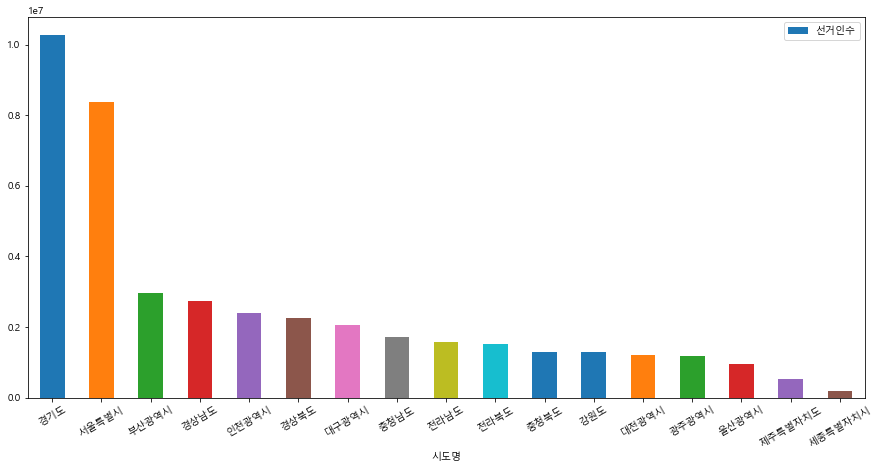

In [192]:
summ.plot.bar('시도명', '선거인수', figsize = (15, 7), rot = 30)

위에서 언급 하였듯 투표수는 (총)득표수와 무효투표수의 합으로 확인된다.  어떤 이유에서 무효투표 처리 됐든 이는 "투표 의사를 분명히 표현하지 못한 자" 또는 지역구 선관위 개표결과의 엄함 정도를 나타내는 지표가 이해할 수 있을 듯하다.  (총)득표수는 이에 반하는 의미로서 "투표 의사를 분명히 표현한 자"로 해석 될 수 있다.  기권수는 "투표 의사는 있지만 passive한 선택을 한 인원 수로 볼 수 있을 듯 하다.

따라서 밑의 3가지 지표의 breakdown은 각 선거구 선거인수의 "성격"을 보여주는 좋은 지표가 될 수 있다

* 득표수
* 무효투표수
* 기권수

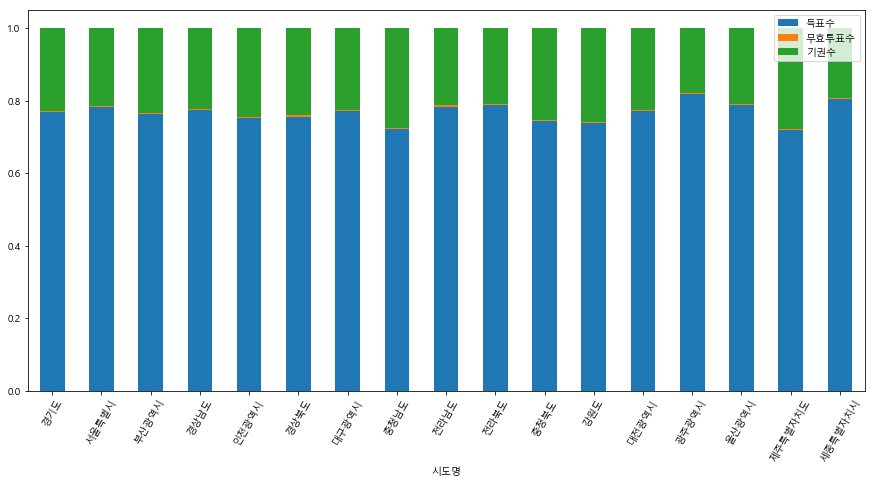

In [230]:
stacked = summ[['시도명', '득표수', '무효투표수', '기권수']].set_index('시도명')
stacked = stacked.div(stacked.sum(1), axis = 0)
stacked.plot.bar(figsize = (15, 7), stacked=True, rot = 60)

시도명 별로 크게 눈에 뛰는 패턴이 드러나보이지는 않는듯하다.  그러나 실제 수치로 들어가 보면 시도명 별 전체 선거인수의 %수치로 무효투표수는 2배 이상 그리고 기권수는 1.5배 이상 차이가 나는 것으로 드러난다. 이는 시도명 별로 꽤나 interesting한 pattern을 보인다.  무표투표수는 워낙에 작은 수치이기에 선거의 당락을 결정짓는 요소로 이해하기 보단 그 지역구 선거인수의 성격을 보여주는 수치로서 더 유용할 듯하나, 기권수는 각 시도 선거인수의 20% 이상을 상회하게 때문에, close race에서는 선거의 결과를 좌우하는 하나의 중요한 요인이 될 수 있다. 

In [233]:
(stacked.max() / stacked.min()).sort_values(ascending = False)

무효투표수    2.167229
기권수      1.542874
득표수      1.138149
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8AD1E8CC0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8AD137E80>]], dtype=object)

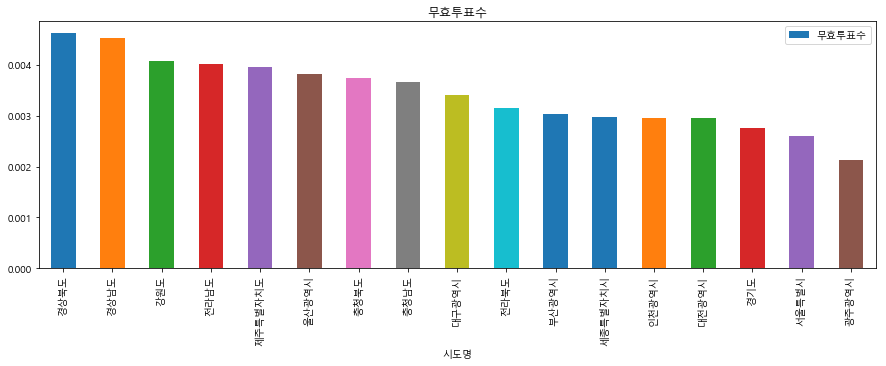

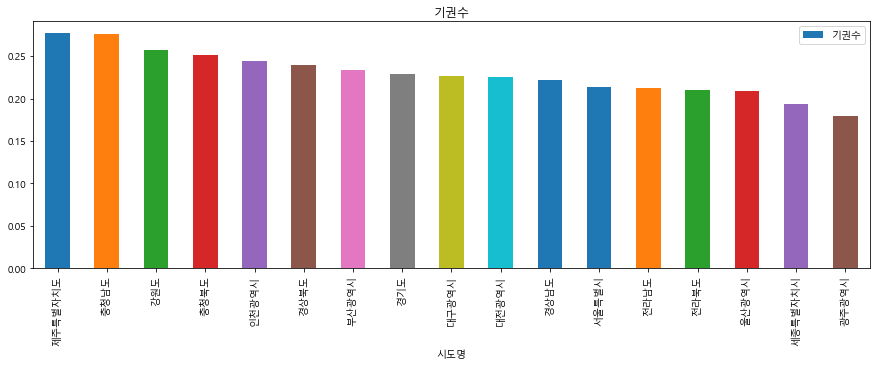

In [246]:
stacked.sort_values('무효투표수', ascending = False).plot.bar(y = '무효투표수', figsize = (15,10), subplots=True, layout=(2,1))
stacked.sort_values('기권수', ascending = False).plot.bar(y = '기권수', figsize = (15,10), subplots = True, layout = (2,1))
# try clustering these charts into 3 groups.